In [21]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

with open('x_train_preprocessed.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train_preprocessed.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('x_test_preprocessed.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test_preprocessed.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('input_shape.pkl', 'rb') as f:
    input_shape = pickle.load(f)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("input_shape:", input_shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
input_shape: (32, 32, 3)


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [4]:
input_shape

(32, 32, 3)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=10, activation='softmax'))


/Users/parthabhang/Desktop/DL/cifar-10/cifarenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,780,822 (6.79 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 890,412 (3.40 MB)

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[TensorBoard(log_dir='./logs')])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.3490 - loss: 1.7713 - val_accuracy: 0.5653 - val_loss: 1.2249
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6007 - loss: 1.1304 - val_accuracy: 0.5952 - val_loss: 1.1430
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6733 - loss: 0.9296 - val_accuracy: 0.6740 - val_loss: 0.9347
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7190 - loss: 0.8100 - val_accuracy: 0.6849 - val_loss: 1.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7475 - loss: 0.7349 - val_accuracy: 0.7481 - val_loss: 0.7533
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7609 - loss: 0.7036 - val_accuracy: 0.7510 - val_loss: 0.7903
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7714 - loss: 0.6740 - val_accuracy: 0.7385 - val_loss: 0.8145
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1951s 1s/step - accuracy: 0.7712 -

In [10]:
model.save('model.h5')

In [11]:
evaluate = model.evaluate(x_test, y_test)
print("Test Accuracy: {}".format(evaluate[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6841 - loss: 0.9131
Test Accuracy: 0.6845999956130981


In [29]:
predict_classes = model.predict(x_test)
predict_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[7.42387027e-03, 1.60114688e-03, 4.15831506e-02, ...,
        3.74380462e-02, 1.06123732e-02, 2.63935141e-03],
       [3.41565050e-02, 5.41080572e-02, 1.39882974e-03, ...,
        2.94992078e-05, 8.90829623e-01, 1.66404955e-02],
       [7.64081627e-02, 6.43189326e-02, 1.61234979e-02, ...,
        1.61174254e-03, 7.76772499e-01, 3.59782241e-02],
       ...,
       [4.27564191e-06, 7.10872337e-06, 1.12568587e-02, ...,
        1.77406278e-02, 2.83031659e-05, 1.88555292e-04],
       [1.37964934e-02, 1.36516085e-02, 7.01947957e-02, ...,
        2.45427410e-03, 3.47618188e-05, 1.32446585e-04],
       [1.41106220e-08, 4.73151518e-10, 6.85887130e-07, ...,
        8.71136308e-01, 1.65662550e-09, 7.66902819e-10]], dtype=float32)

In [31]:
y_test = y_test.argmax(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [19]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

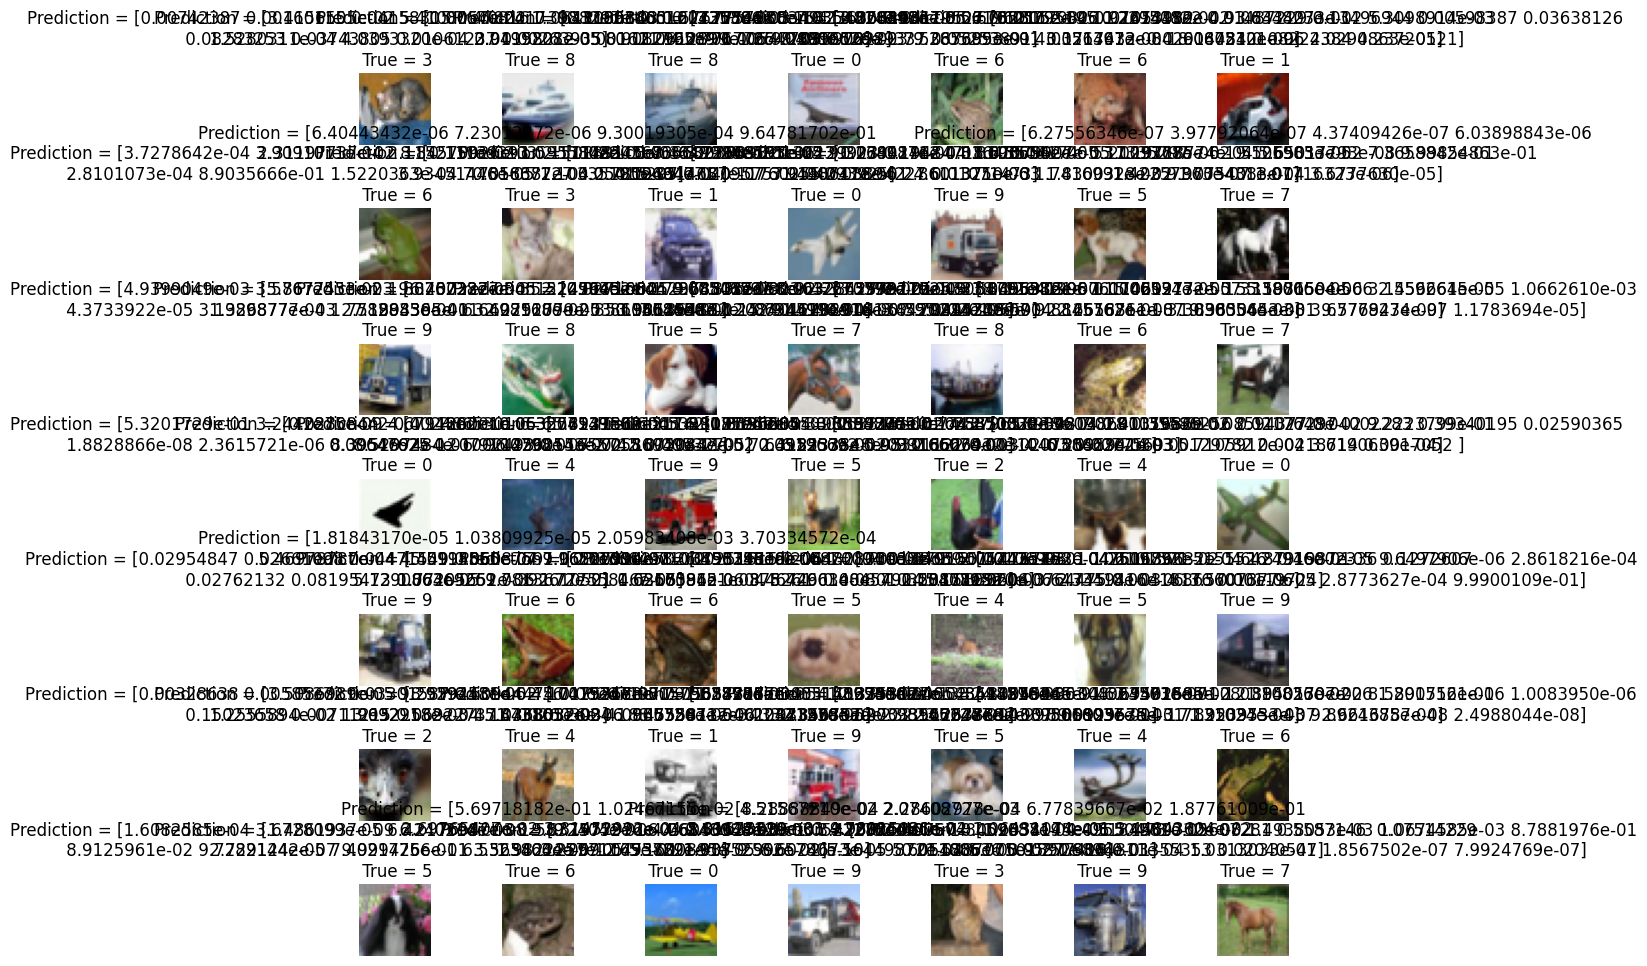

In [25]:
l=7
w=7
fig,axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predict_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
